## Netlfix Exploratory Data Analysis

![netflix](img.jpeg)

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import missingno as mno

%matplotlib inline

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv', index_col = False)

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<AxesSubplot:>

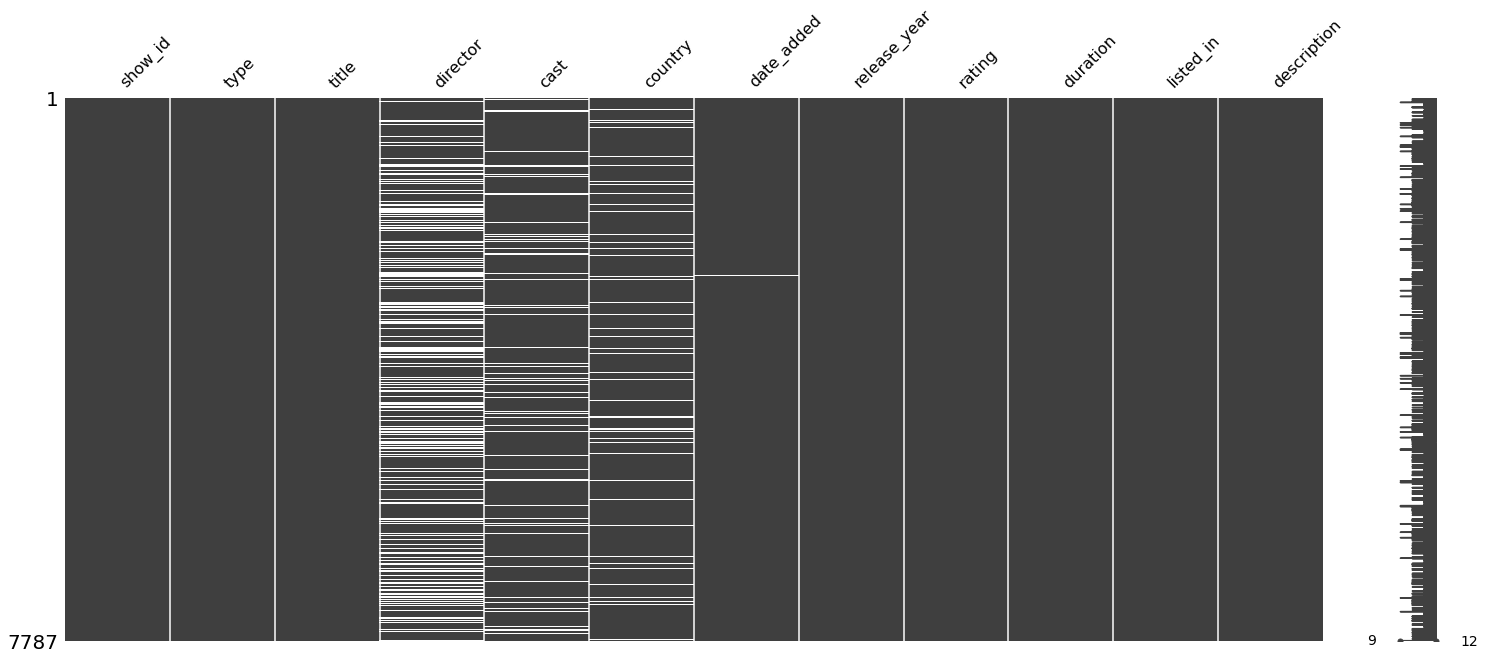

In [4]:
mno.matrix(netflix_df)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
clean_df = netflix_df.drop(['show_id','director','cast'], axis = 1)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [9]:
movies = clean_df.loc[clean_df.type == 'Movie']

In [10]:
tv_shows = clean_df.loc[clean_df.type == 'TV Show']
tv_shows

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,TV Show,Feb-09,NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...
7767,TV Show,Zindagi Gulzar Hai,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,TV Show,Zoids Wild,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,TV Show,Zona Rosa,Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [26]:
tv_country = tv_shows['country'].value_counts()[tv_shows['country'].value_counts(normalize=True)>0.005]

<function matplotlib.pyplot.show(close=None, block=None)>

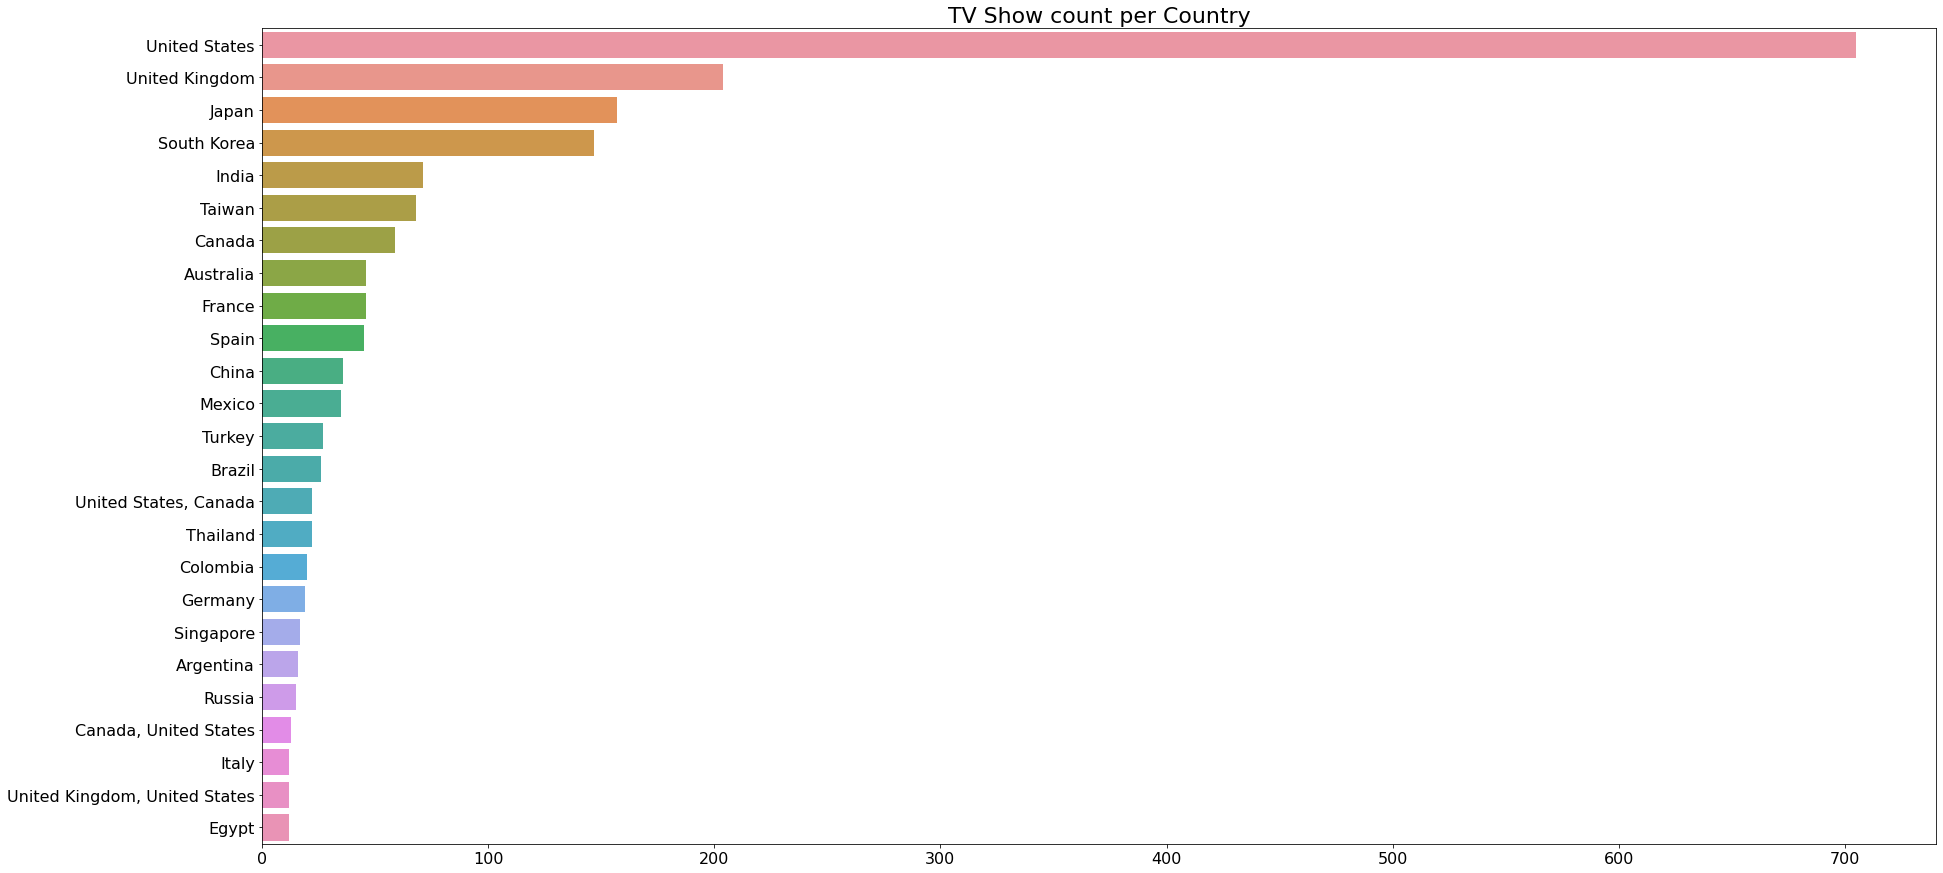

In [19]:
plt.figure(figsize = (30,15))
plt.title('TV Show count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = tv_country.index, x = tv_country.values)
plt.show

In [21]:
movie_country = movies['country'].value_counts()[movies['country'].value_counts(normalize=True)>0.005]

<function matplotlib.pyplot.show(close=None, block=None)>

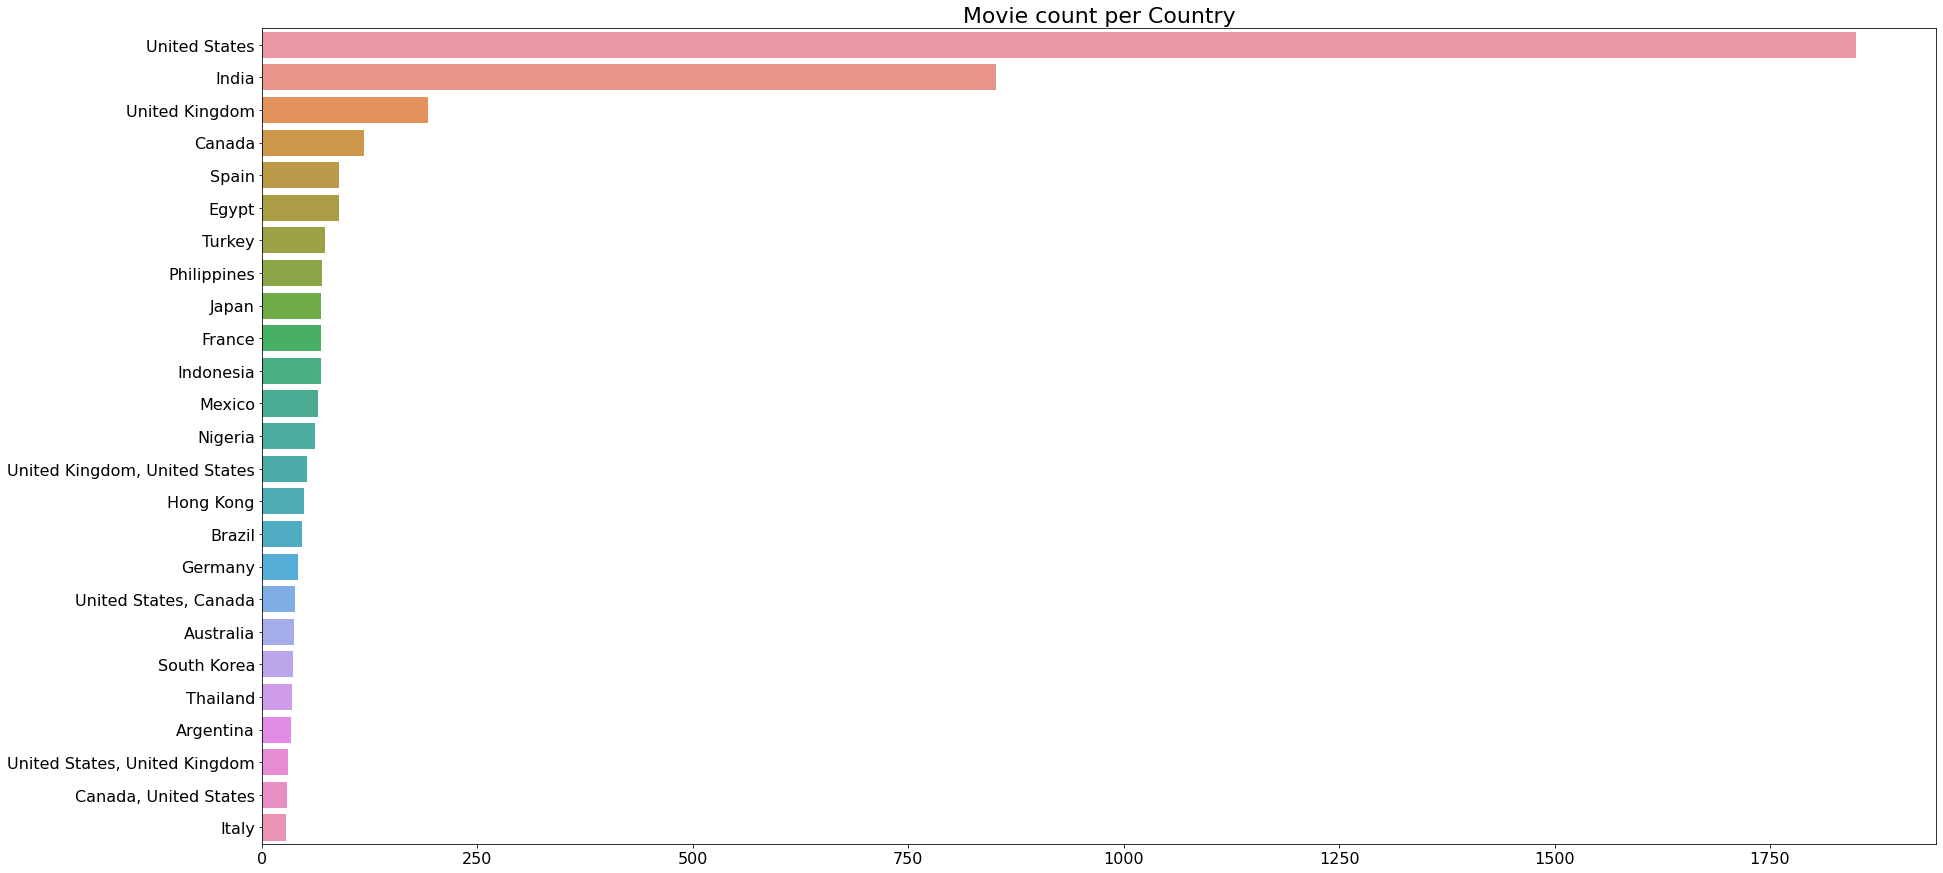

In [22]:
plt.figure(figsize = (30,15))
plt.title('Movie count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = movie_country.index, x = movie_country.values)
plt.show